In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install imbalanced-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [5]:
# Step 1: Load the dataset
df = pd.read_csv("loan_data.csv")
print("Initial shape of dataset:", df.shape)

Initial shape of dataset: (307511, 122)


In [6]:
print("\nNull values in each column:")
print(df.isnull().sum())


Null values in each column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [7]:
df.dropna(thresh=int(0.5*df.shape[0]), axis=1, inplace=True)
df.dropna(inplace=True)

In [8]:
# Step 3: Print percentage of default
target_counts = df['TARGET'].value_counts()
default_rate = (target_counts[1] / target_counts.sum()) * 100
print(f"\nDefault Rate: {default_rate:.2f}%")


Default Rate: 7.42%


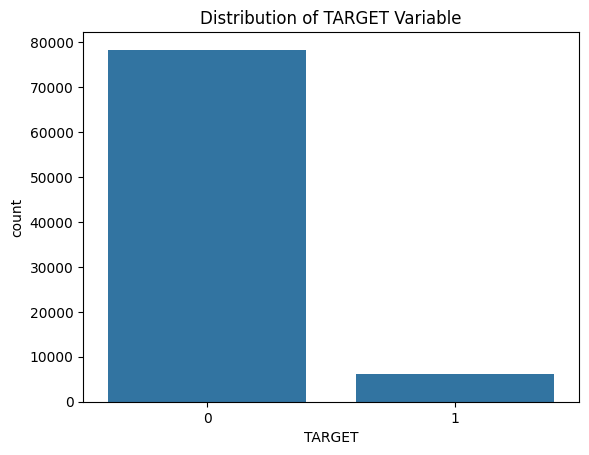

In [9]:
# Step 4: Plot imbalanced data
sns.countplot(x='TARGET', data=df)
plt.title("Distribution of TARGET Variable")
plt.show()

In [10]:
# Step 5: Balance the dataset using SMOTE
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [11]:
# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [12]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

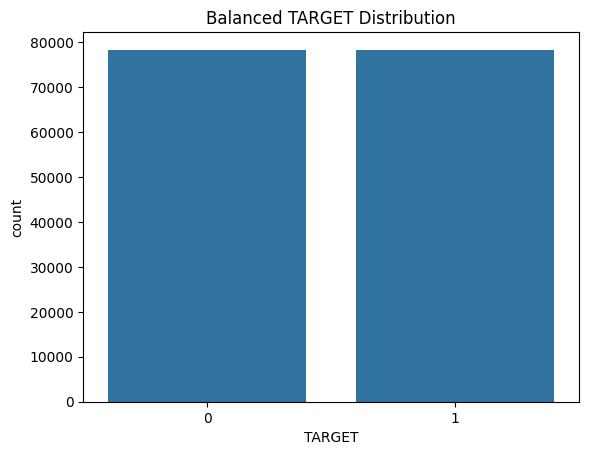

In [14]:
# Plot balanced data
sns.countplot(x=y_resampled)
plt.title("Balanced TARGET Distribution")
plt.show()

In [15]:
# Step 6: Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [16]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [17]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          10,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,505 (84.00 KB)

 Trainable params: 21,121 (82.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [19]:
# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.6510 - loss: 0.6443 - val_accuracy: 0.7358 - val_loss: 0.5373
Epoch 2/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7327 - loss: 0.5434 - val_accuracy: 0.7675 - val_loss: 0.4951
Epoch 3/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.7542 - loss: 0.5133 - val_accuracy: 0.7873 - val_loss: 0.4794
Epoch 4/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7655 - loss: 0.4966 - val_accuracy: 0.7859 - val_loss: 0.4727
Epoch 5/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.7727 - loss: 0.4819 - val_accuracy: 0.8004 - val_loss: 0.4525
Epoch 6/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7779 - loss: 0.4737 - val_accuracy: 0.8070 - val_loss: 0.4329
Epoch 7/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7811 - loss: 0.4672 - val_accuracy: 0.8078 - val_loss: 0.4419
Epoch 8/20
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7857 - lo

In [20]:
# Step 9: Evaluate the model
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

979/979 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84     15561
           1       0.83      0.87      0.85     15759

    accuracy                           0.84     31320
   macro avg       0.84      0.84      0.84     31320
weighted avg       0.84      0.84      0.84     31320



In [21]:
# Sensitivity (Recall for class 1)
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
FN = cm[1, 0]
sensitivity = TP / (TP + FN)
print(f"\nSensitivity: {sensitivity:.4f}")


Sensitivity: 0.8724


In [22]:
# AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_score:.4f}")

AUC-ROC Score: 0.9217


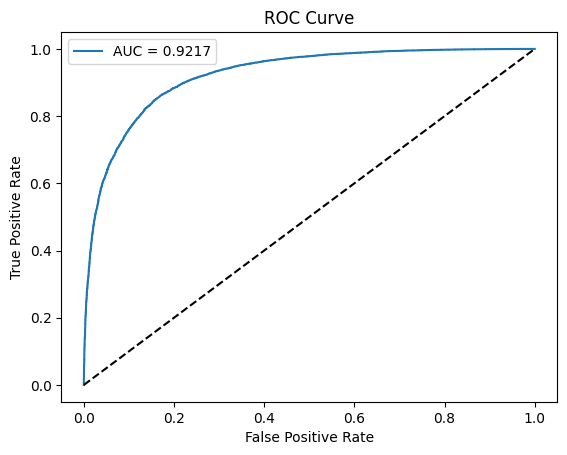

In [23]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()